# **Project Name**    -    Cardiovascular Risk Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
# from ShuffleSplit import shuffle_split_cv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 17.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=552498 sha256=13ec7056f63bf2785034898ad492cc3dd7615345567a2f314b1b5ab50a9762d4
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Classification - ML Project/data_cardiovascular_risk.csv'

In [4]:
df_org = pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
df = df_org.copy()
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
cat_vars = ['education','sex','is_smoking','BPMeds','prevalentStroke','diabetes','TenYearCHD']
num_vars = ['age','cigsPerDay','prevalentHyp','totChol','sysBP','diaBP','BMI','heartRate','glucose']

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
for i in df.columns:
  print(f'The unique values for {i} is',df[i].nunique())

print(df.shape)

The unique values for id is 3390
The unique values for age is 39
The unique values for education is 4
The unique values for sex is 2
The unique values for is_smoking is 2
The unique values for cigsPerDay is 32
The unique values for BPMeds is 2
The unique values for prevalentStroke is 2
The unique values for prevalentHyp is 2
The unique values for diabetes is 2
The unique values for totChol is 240
The unique values for sysBP is 226
The unique values for diaBP is 142
The unique values for BMI is 1259
The unique values for heartRate is 68
The unique values for glucose is 132
The unique values for TenYearCHD is 2
(3390, 17)


In [13]:
print(df['education'].shape,'\n',df['education'].value_counts())

(3390,) 
 1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64


In [14]:
# Visualizing the missing values

### What did you know about your dataset?

The dataset provided is from an ongoing cardiovascular study.

The dataset consists of 17 columns and has 3390 entries, classification goal is to predict 10-year risk of future coronary heart disease 'TenYearCHD' for an individual.

The missing values is found in the following columns:


- education           87
- cigsPerDay          22
- BPMeds              44
- totChol             38
- BMI                 14
- heartRate            1
- glucose            304

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
print('Columns:\n',df.columns,'\n',df.shape)

Columns:
 Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object') 
 (3390, 17)


In [16]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

- id : It has 3390 unique entries for id
- age : Numerical data Consists of the age for an individual
- education : 4
- sex : Categorical Data with entries as M/F
- is_smoking : Categorical Data with entries as Y/N
- cigsPerDay : Numerical data consisting of the number of cigrettes smoked per day ranging from 0-70
- BPMeds : Categorical data with entries as 0-No/1-Yes
- prevalentStroke : Categorical data with entries as 0-No/1-Yes
- prevalentHyp : Consists the info about history with hypertension
- diabetes : Categorical data of a individual having diabetes or not
- totChol : Numerical data on Cholestrol measure of an idividual anging from 107-696
- sysBP : Numerical data on systolic BP Measure ranging from 83.5-295
- diaBP : Numerical data BP measure ranging from 48-142.5
- BMI : Numerical data of BMI of an individual ranging from 15.96-56.8
- heartRate : Numerical data for heart rate
- glucose : Numerical data for glucose
- TenYearCHD : Categorical Target variable having classification as 0/1

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
print(f'The unique value for :\n')
for i in df.columns:
  print(f'{i} :',df[i].nunique())

The unique value for :

id : 3390
age : 39
education : 4
sex : 2
is_smoking : 2
cigsPerDay : 32
BPMeds : 2
prevalentStroke : 2
prevalentHyp : 2
diabetes : 2
totChol : 240
sysBP : 226
diaBP : 142
BMI : 1259
heartRate : 68
glucose : 132
TenYearCHD : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [19]:
df.drop('id',axis=1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [20]:
print(df['TenYearCHD'].isna().sum())

0


In [21]:
before = df.shape[0]
df = df.dropna(subset=cat_vars,axis=0)
# df = df[df['number_of_reviews']>0]
after = df.shape[0]
print(before,after)

df = df[cat_vars + num_vars]

3390 3259


In [22]:
df.isna().sum()

education            0
sex                  0
is_smoking           0
BPMeds               0
prevalentStroke      0
diabetes             0
TenYearCHD           0
age                  0
cigsPerDay          20
prevalentHyp         0
totChol             36
sysBP                0
diaBP                0
BMI                 13
heartRate            1
glucose            296
dtype: int64


- education           87
- cigsPerDay          22
- BPMeds              44
- totChol             38
- BMI                 14
- heartRate            1
- glucose            304

In [23]:
df.head(5)

,education,sex,is_smoking,BPMeds,prevalentStroke,diabetes,TenYearCHD,age,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,2.0,F,YES,0.0,0,0,1,64,3.0,0,221.0,148.0,85.0,NaN,90.0,80.0
1,4.0,M,NO,0.0,0,0,0,36,0.0,1,212.0,168.0,98.0,29.77,72.0,75.0
2,1.0,F,YES,0.0,0,0,0,46,10.0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,1.0,M,YES,0.0,0,0,1,50,20.0,1,233.0,158.0,88.0,28.26,68.0,94.0
4,1.0,F,YES,0.0,0,0,0,64,30.0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [24]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [25]:
# Chart - 1 visualization code

array([[<Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'TenYearCHD'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>, <Axes: >, <Axes: >]],
      dtype=object)

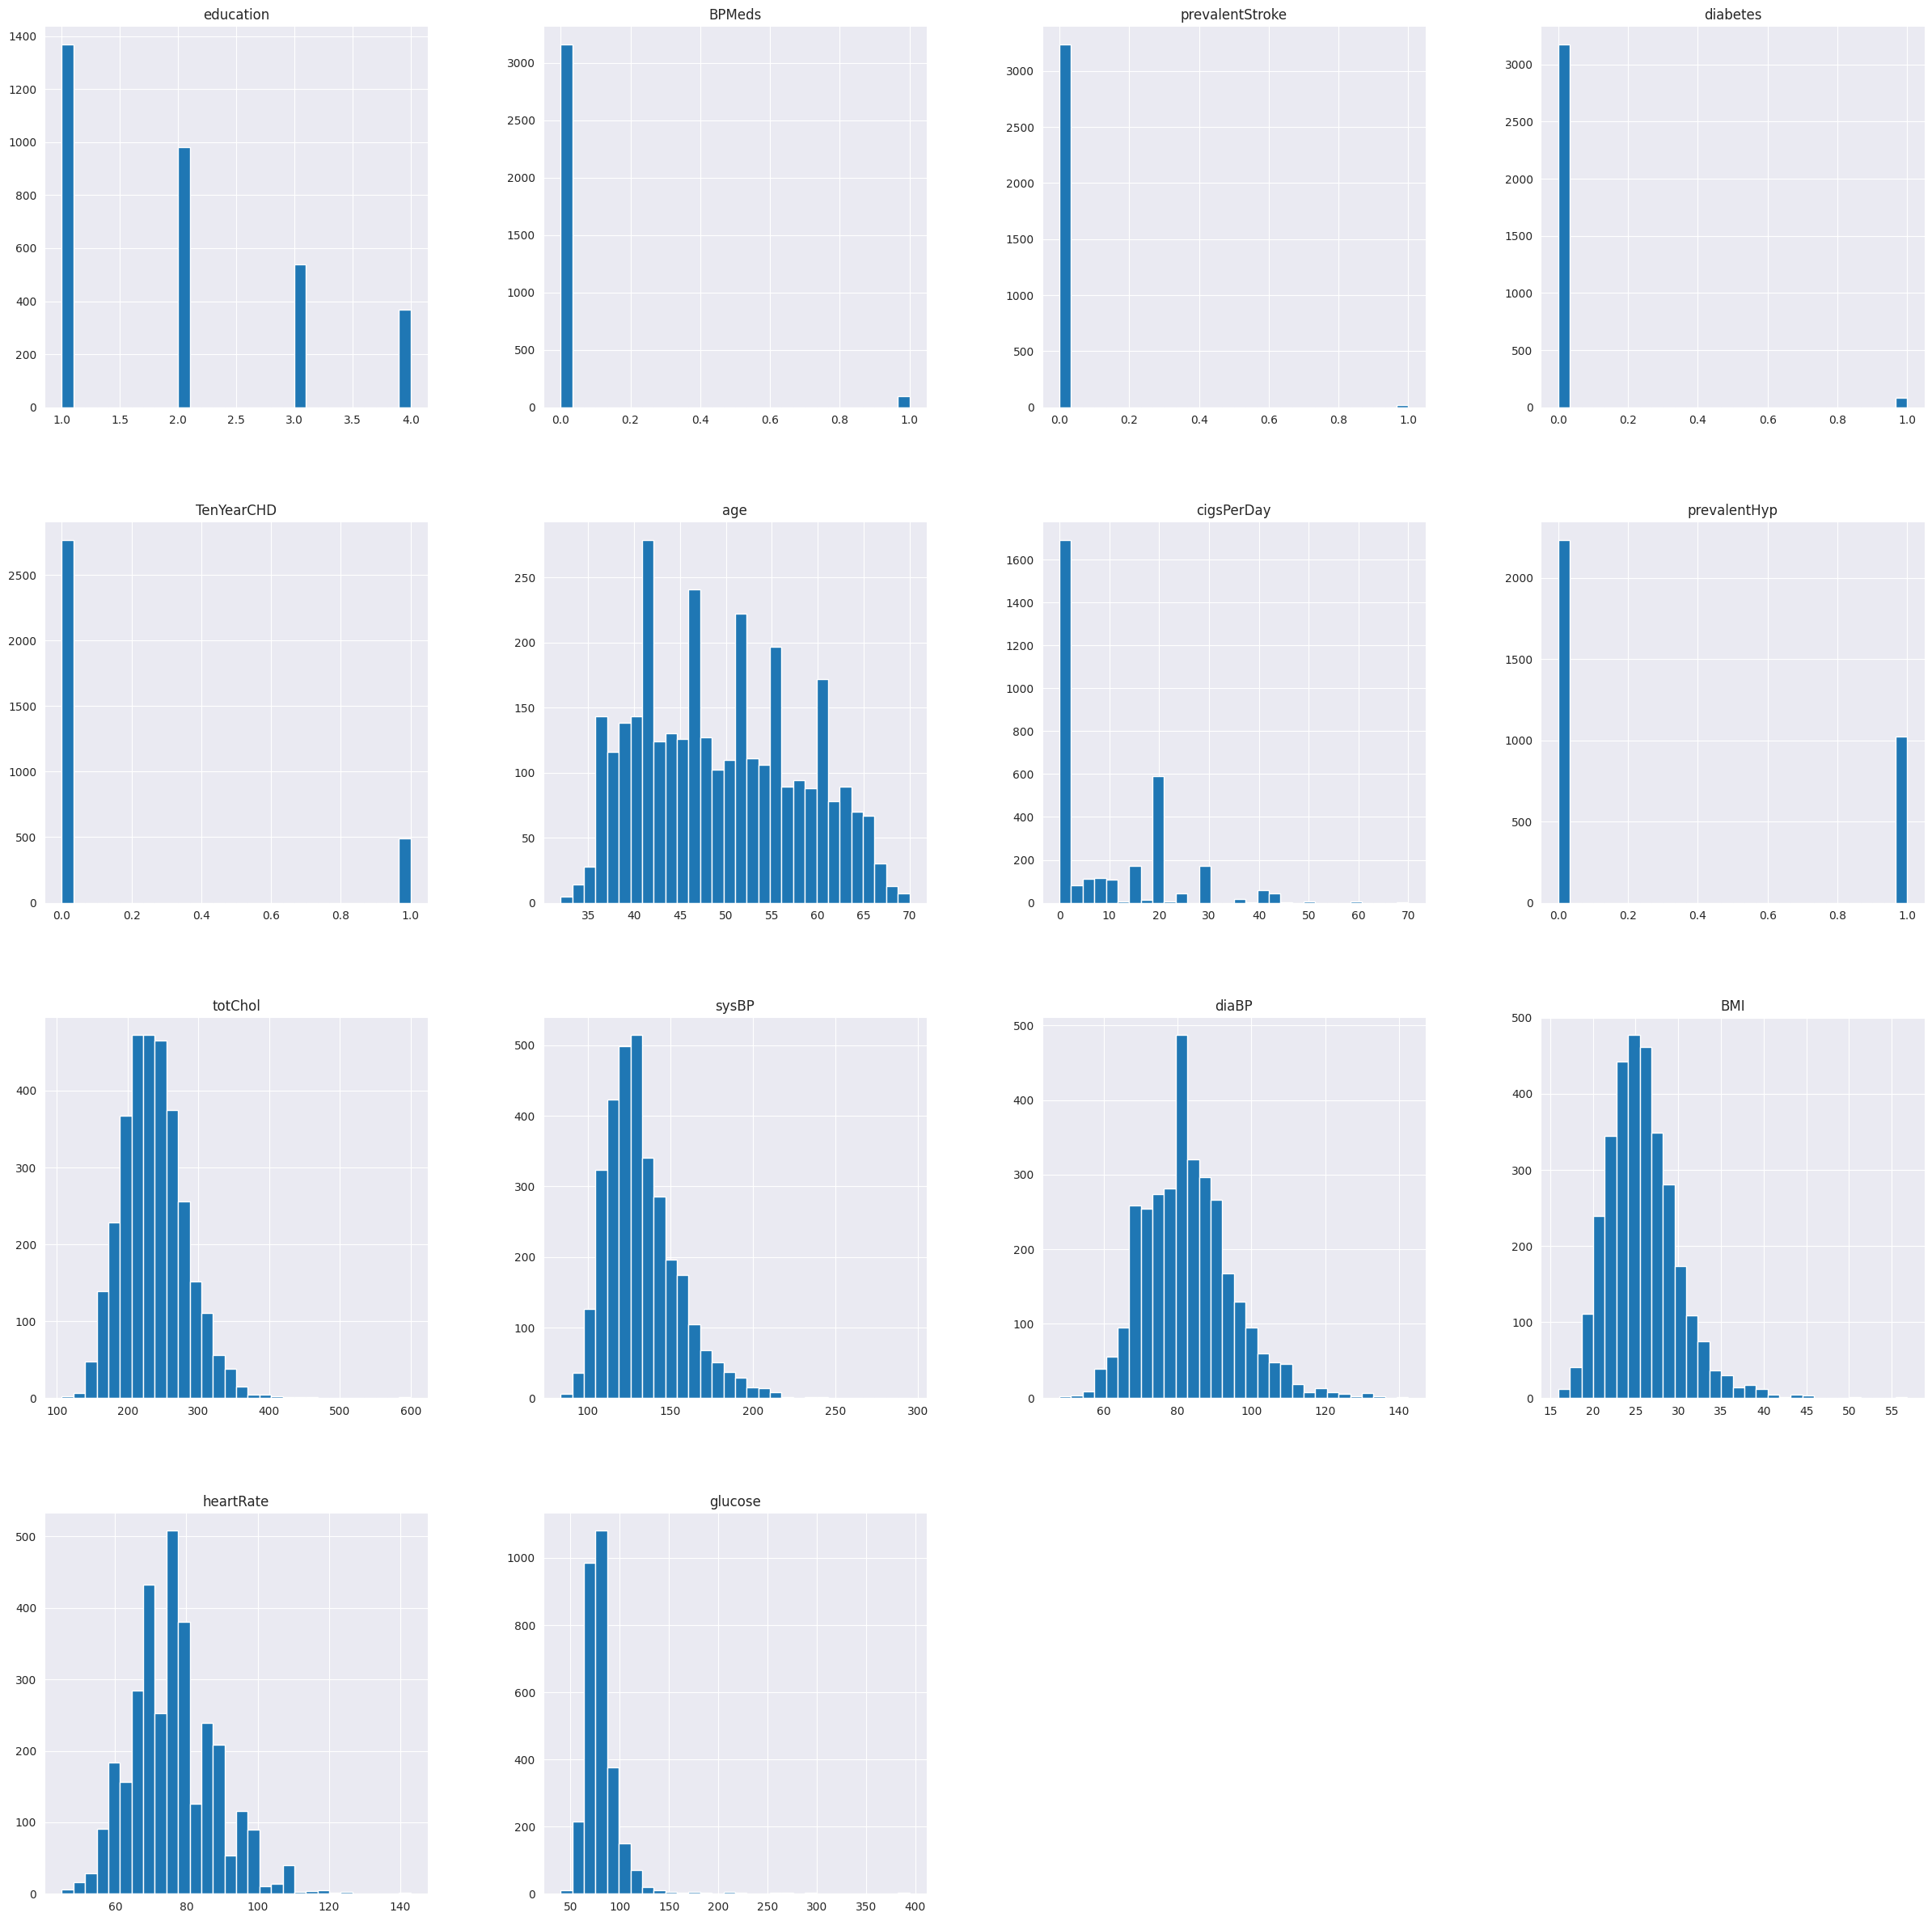

In [26]:
df.hist(bins=30,figsize=(30,30))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [27]:
# Chart - 2 visualization code

<Axes: xlabel='cigsPerDay', ylabel='Density'>

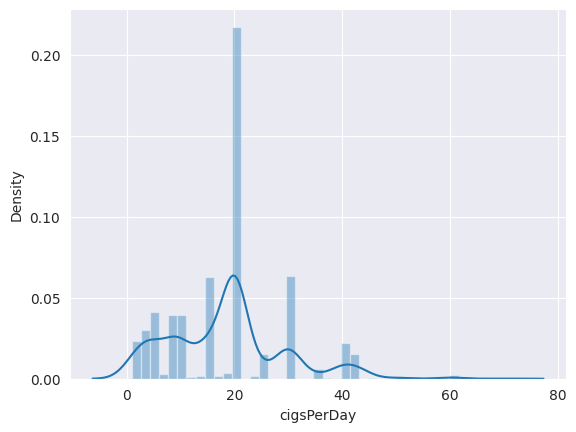

In [29]:
sns.distplot(df[df['is_smoking']=='YES']['cigsPerDay'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

<Axes: >

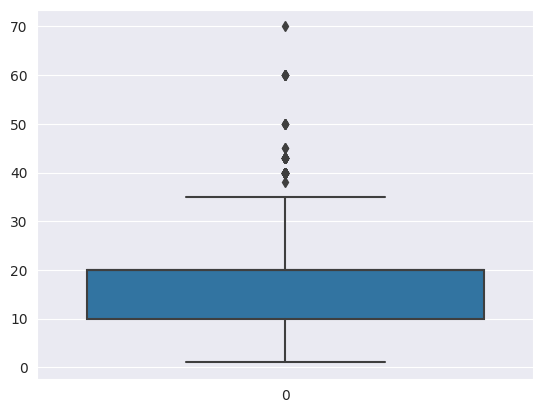

In [30]:
sns.boxplot(df[df['is_smoking']=='YES']['cigsPerDay'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [ ]:
# features.drop('id',axis=1)

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
    # ('add_variables', NewVariablesAdder()),
    # ('std_scaler', StandardScaler())
])

num_transformed = num_pipeline.fit_transform(df[num_vars])
num_transformed = pd.DataFrame(num_transformed)
num_transformed.columns = num_vars

In [ ]:
num_transformed.isna().sum()

In [ ]:
num_transformed.info()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
print(f'The unique value for :\n')
for i in df.columns:
  print(f'{i} :',df[i].nunique())

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ('add_variables', NewVariablesAdder()),
    ('robust_scaler', RobustScaler())
])
# num_transformed = num_pipeline.fit_transform(df[num_vars])
# num_transformed = pd.DataFrame(num_transformed)
# num_transformed.columns = num_vars

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
data_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_vars),
    ('categorical', OneHotEncoder(), cat_vars),

])
# df_transformed.columns = df.columns

In [ ]:
# import pandas as pd
# from category_encoders.one_hot import OneHotEncoder

# ohenc = OneHotEncoder(sparse=False)
# x_cat_df = pd.DataFrame(ohenc.fit_transform(df))


In [ ]:
# features_processed = data_pipeline.fit_transform(df)
# df_transformed = pd.DataFrame(features_processed)

In [ ]:
# data_pipeline.named_steps['categorical']

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [ ]:
df1 = df_org.copy()

In [ ]:
before = df1.shape[0]
df1 = df1.dropna(subset=cat_vars,axis=0)
# df1 = df1[df1['number_of_reviews']>0]
after = df1.shape[0]
print(before,after)

df1 = df1[cat_vars + num_vars]

In [ ]:
features = df1.loc[:,['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'diabetes', 'glucose', 'age', 'cigsPerDay', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']]
labels = pd.DataFrame(df1.loc[:,'TenYearCHD'])
print(features.columns,'\n',labels.columns)
print(features.shape,labels.shape)
print(df1.shape)

In [ ]:
features.info()

In [ ]:
labels.info()

In [ ]:
features.isna().sum()

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
df.head(5)

In [ ]:
# Scaling your data

In [ ]:
# df_label = df.pop('TenYearCHD')

In [ ]:
df.head(5)

In [ ]:
features_processed = data_pipeline.fit_transform(df)
df_transformed = pd.DataFrame(features_processed)

In [ ]:
df_transformed.columns = data_pipeline.get_feature_names_out(input_features=df.columns)

In [ ]:
df_transformed.head(5)

In [ ]:
df_transformed['TenYearCHD'] = labels
df_transformed.drop(['categorical__TenYearCHD_0','categorical__TenYearCHD_1'],axis=1,inplace=True)

In [ ]:
df_transformed.head(5)

In [ ]:
# df_transformed.drop(['categorical__TenYearCHD_0','categorical__TenYearCHD_1'],axis=1,inplace=True)

In [ ]:
# df_transformed.columns = data_pipeline.name_transformers_('categorical').get_feature_names_out('categorical')

In [ ]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0)
# clf_pipeline = Pipeline(steps=[
#     ('data_pipeline', data_pipeline),
#     ('model', clf)
# ])

In [ ]:
# encoder = OneHotEncoder(sparse=False)
# onehot_encoded = encoder.fit_transform(df[data_column_category])
# onehot_encoded_frame = pd.DataFrame(onehot_encoded,columns = encoder.get_feature_names(data_column_category))

In [ ]:
# # numerical columns not change, categorical columns change from one-hot encoder
# new_cat_cols = clf_pipeline.named_steps["data_pipeline"].named_transformers_["categorical"].get_feature_names(cat_vars)
# # concatenate categorical columns with numerical columns to get all columns
# all_cols = np.concatenate([num_vars, new_cat_cols])

In [ ]:
df_transformed.describe()

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
df_transformed.isnull().sum().sum()

In [ ]:
df_transformed.dropna(inplace=True)

In [ ]:
df_transformed.iloc[:,:-1]

In [ ]:
df_transformed.iloc[:,-1]

In [ ]:
X = df_transformed.iloc[:,:-1]

In [ ]:
X.head(5)

In [ ]:
y = pd.DataFrame(df_transformed.iloc[:,-1])

In [ ]:
y.head(5)

In [ ]:
y.isnull().sum()

In [ ]:
for train, test in split.split(X,y):
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
logistic_model.score(X_train,y_train)

In [ ]:
y_pred_m1=logistic_model.predict(X_test)
acc_m1=accuracy_score(y_pred_m1,y_test)

In [ ]:
print(acc_m1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***